# Predicting On-time Delivery of Online Purchases
## Part III-B: Modeling - Naive Bayes Classifier
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Import Common Functions

In [1]:
%run shipping_common_functions.ipynb

## Imports

In [16]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## Load Preprocessed Data

In [3]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

In [4]:
# Check imported data
print('TRAIN SET:')
print('   X_train:', X_train.shape)
print('   y_train:', y_train.shape)
print('\nVALIDATION SET:')
print('   X_val:', X_val.shape)
print('   y_val:', y_val.shape)

TRAIN SET:
   X_train: (8799, 17)
   y_train: (8799,)

VALIDATION SET:
   X_val: (1100, 17)
   y_val: (1100,)


In [5]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.925605,5,-0.670120,-0.378680,1,-0.392911,0.311901,0,0,0,0,1,0,0,1,1,0
1,1.697108,3,-0.173246,0.273631,2,-0.638968,0.532606,1,0,0,0,0,0,0,1,1,0
2,-1.799843,5,1.379486,-0.378680,2,-0.454426,-1.585178,0,0,0,1,0,0,0,1,0,1
3,0.822870,5,0.178707,-1.030992,2,-0.577454,0.406052,0,0,1,0,0,0,0,1,0,1
4,1.697108,3,1.772845,0.273631,1,-0.577454,-1.207352,0,0,1,0,0,1,0,0,1,0


In [6]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.051367,2,1.213861,-1.030992,2,-0.700483,0.237314,0,0,0,1,0,0,1,0,1,0
1,-0.051367,2,-0.421683,-0.378680,2,-0.392911,0.697675,1,0,0,0,0,0,1,0,0,1
2,-0.051367,1,-0.297464,-1.030992,1,-0.638968,0.689116,0,0,0,1,0,0,0,1,0,1
3,-0.925605,3,-0.152543,-0.378680,2,-0.392911,0.826674,0,0,0,1,0,1,0,0,0,1
4,0.822870,5,0.779096,0.925943,2,-0.331397,-1.066126,1,0,0,0,0,1,0,0,0,1


## Model 1: Naive Bayes Classifier

Naive bayes classifier to predict on-time shipments.

### Model 1: Create, Train Model

In [8]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

### Model 1: Describe/Visualize Model

In [14]:
############# Update this section ###################

### Model 1: Performance on Validation Set

In [10]:
# predict y values based on the validation set
y_pred1 = gnb_model.predict(X_val)

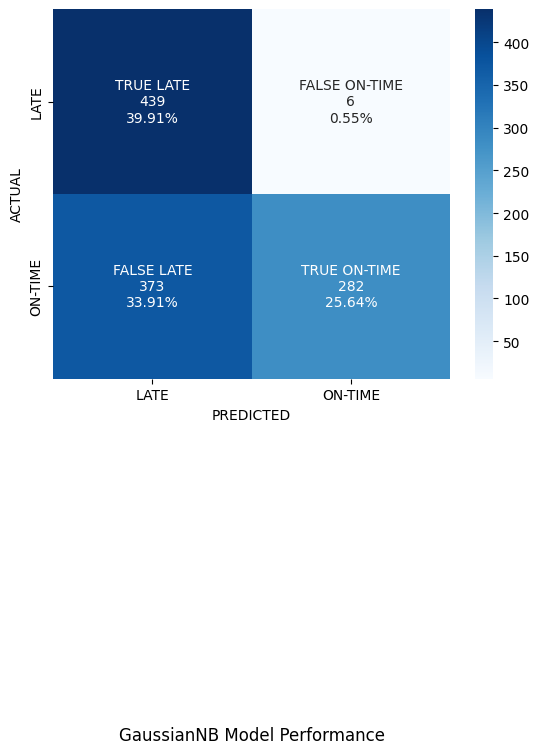

In [12]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1, title = 'GaussianNB Model Performance')

In [13]:
# Generate Classification Report for model 1
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1, title = 'GaussianNB')
    

              precision    recall  f1-score   support

        LATE       0.54      0.99      0.70       445
     ON-TIME       0.98      0.43      0.60       655

    accuracy                           0.66      1100
   macro avg       0.76      0.71      0.65      1100
weighted avg       0.80      0.66      0.64      1100



## Model 2: Support Vector Machine (SVM)

....

### Model 2: Create, train, evaluate

In [17]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Model 2: Performance on Validation Set

In [18]:
# predict y values based on the validation set
y_pred2 = svm_model.predict(X_val)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

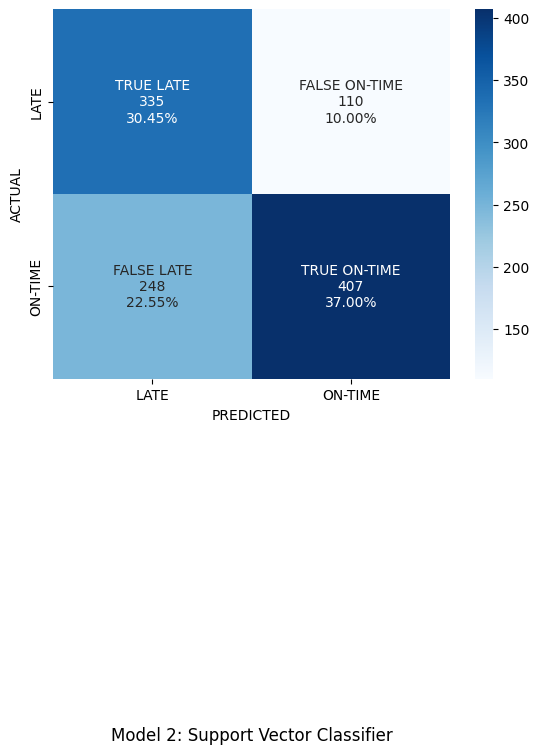

In [19]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2, title = 'Model 2: Support Vector Classifier')

In [20]:
# Generate Classification Report for model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2, title = 'Model 2: Support Vector Classifier')

              precision    recall  f1-score   support

        LATE       0.57      0.75      0.65       445
     ON-TIME       0.79      0.62      0.69       655

    accuracy                           0.67      1100
   macro avg       0.68      0.69      0.67      1100
weighted avg       0.70      0.67      0.68      1100

